In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import swifter
from nltk.corpus import stopwords
from collections import Counter

c:\Users\phku0\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_parquet('data/dataset_merged.parquet')

In [3]:
df.columns

Index(['title', 'summary', 'time_published', 'source',
       'title_sentiment_finbert', 'summary_sentiment_finbert',
       'title_sentiment_vader', 'summary_sentiment_vader', 'NER',
       'topic_announcements', 'topic_market_movements', 'topic_legal_actions',
       'topic_investment_sentiment', 'topic_earnings', 'topic_analyst_ratings',
       'topic_macro_econ', 'topic_research_insights', 'company_names',
       'stock_tickers', 'sectors'],
      dtype='object')

In [4]:
print(df.shape)
df.head()

(1904665, 20)


,title,summary,time_published,source,title_sentiment_finbert,summary_sentiment_finbert,title_sentiment_vader,summary_sentiment_vader,NER,topic_announcements,topic_market_movements,topic_legal_actions,topic_investment_sentiment,topic_earnings,topic_analyst_ratings,topic_macro_econ,topic_research_insights,company_names,stock_tickers,sectors
newsID,,,,,,,,,,,,,,,,,,,,
1,Oil prices could determine how markets react t...,The heavy new round of sanctions on Russia by ...,2022-03-01 00:02:02,CNBC,"{'label': 'Negative', 'score': 0.63124018907547}","{'label': 'Negative', 'score': 0.6197944283485...",0.0000,0.0000,"[[Russia, GPE], [Ukraine, GPE], [Russia, GPE],...",False,False,False,False,False,False,True,False,[],[],[Energy]
2,Zoom provides disappointing revenue forecast f...,Zoom's revenue growth is continuing to slow af...,2022-03-01 00:15:56,CNBC,"{'label': 'Negative', 'score': 0.9999985694885...","{'label': 'Negative', 'score': 0.9999996423721...",-0.4939,0.3818,"[[Zoom, ORG], [first quarter, DATE], [Zoom, OR...",False,False,False,False,False,False,True,False,[Zoom],[],[]
3,Wall Street rallies as West hits Russia with n...,"The SP 500 rose more than 1%, ending a four-da...",2022-03-01 00:46:51,Money Control,"{'label': 'Neutral', 'score': 0.9479693174362183}","{'label': 'Positive', 'score': 0.9999978542327...",0.0000,-0.5106,"[[Russia, GPE], [more than 1%, PERCENT], [four...",False,False,False,False,True,False,False,False,[],[],[]
4,"Weak manufacturing drags down Q3 GDP growth, o...",India's economy grew 5.4% in the three months ...,2022-03-01 02:23:00,Economic Times,"{'label': 'Negative', 'score': 0.9999984502792...","{'label': 'Negative', 'score': 0.9954470992088...",0.1531,-0.2960,"[[Q3, DATE], [India, GPE], [5.4%, PERCENT], [t...",False,False,False,False,False,False,True,False,[],[],"[Industrials, Energy]"
5,Singapore banks halt lending for Russian goods...,Singapore's biggest banks are restricting trad...,2022-03-01 02:30:56,South China Morning Post,"{'label': 'Negative', 'score': 0.9858503937721...","{'label': 'Negative', 'score': 0.9719559550285...",-0.1027,-0.4215,"[[Singapore, GPE], [Russian, NORP], [Japan, GP...",False,False,False,False,False,False,False,True,[],[],"[Materials, Energy, Financials]"


## Data cleaning and visualisation

### News source

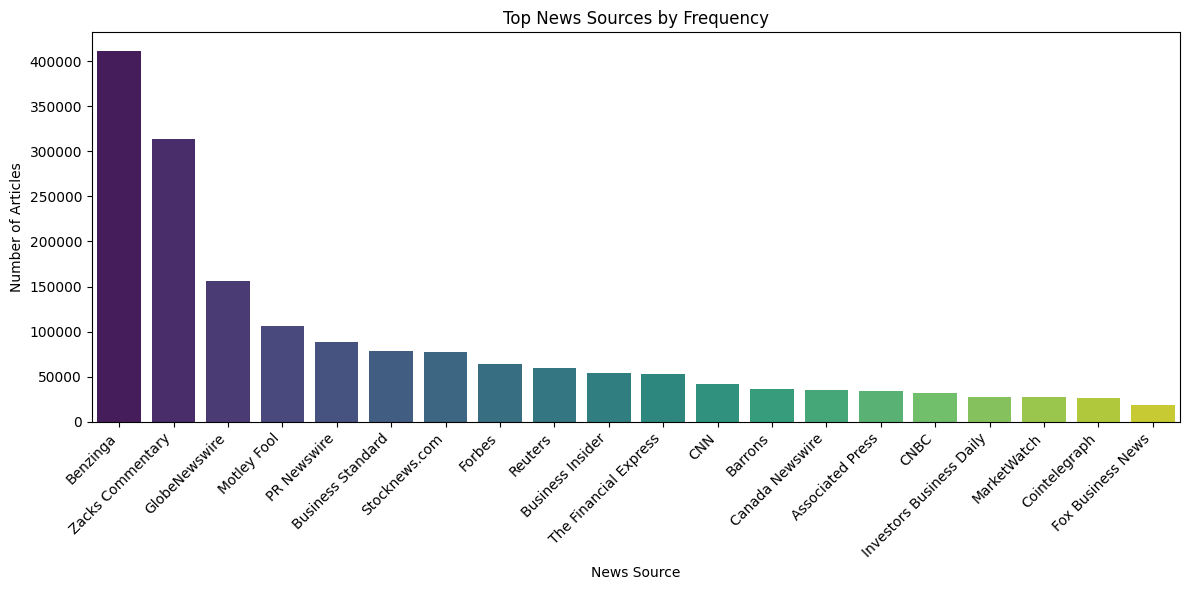

Total unique news sources: 47

Top news sources:
source
Benzinga                    411572
Zacks Commentary            313494
GlobeNewswire               156474
Motley Fool                 105989
PR Newswire                  87969
Business Standard            78463
Stocknews.com                76944
Forbes                       64515
Reuters                      59784
Business Insider             54166
The Financial Express        52501
CNN                          41839
Barrons                      35825
Canada Newswire              34685
Associated Press             34227
CNBC                         31437
Investors Business Daily     27757
MarketWatch                  27385
Cointelegraph                26238
Fox Business News            18208
Name: count, dtype: int64


In [5]:
source_counts = df['source'].value_counts()

top_sources = source_counts.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_sources.index, y=top_sources.values, palette='viridis')
plt.title(f'Top News Sources by Frequency')
plt.xlabel('News Source')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"Total unique news sources: {len(source_counts)}")
print(f"\nTop news sources:\n{top_sources}")

### Time published

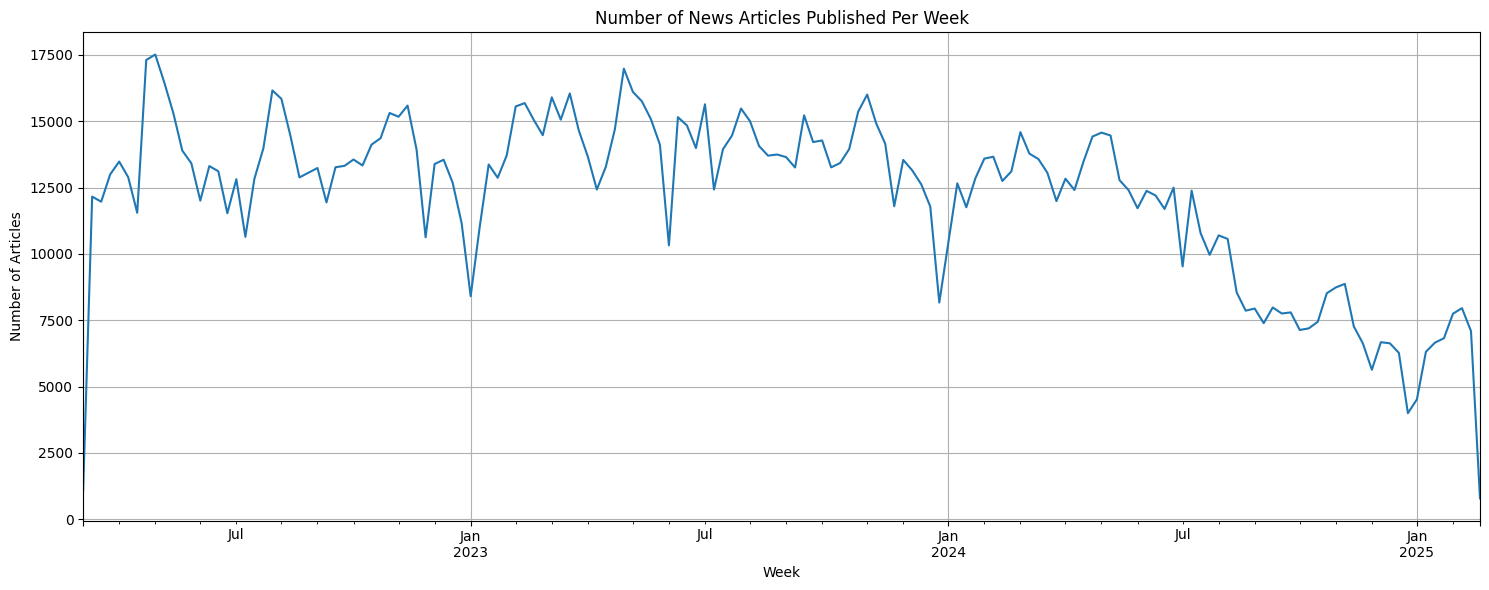

In [6]:
weekly_counts = df.resample('W', on='time_published').size()

# Plot the counts over time
plt.figure(figsize=(15, 6))
weekly_counts.plot(kind='line')
plt.title('Number of News Articles Published Per Week')
plt.xlabel('Week')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.tight_layout()
plt.show()

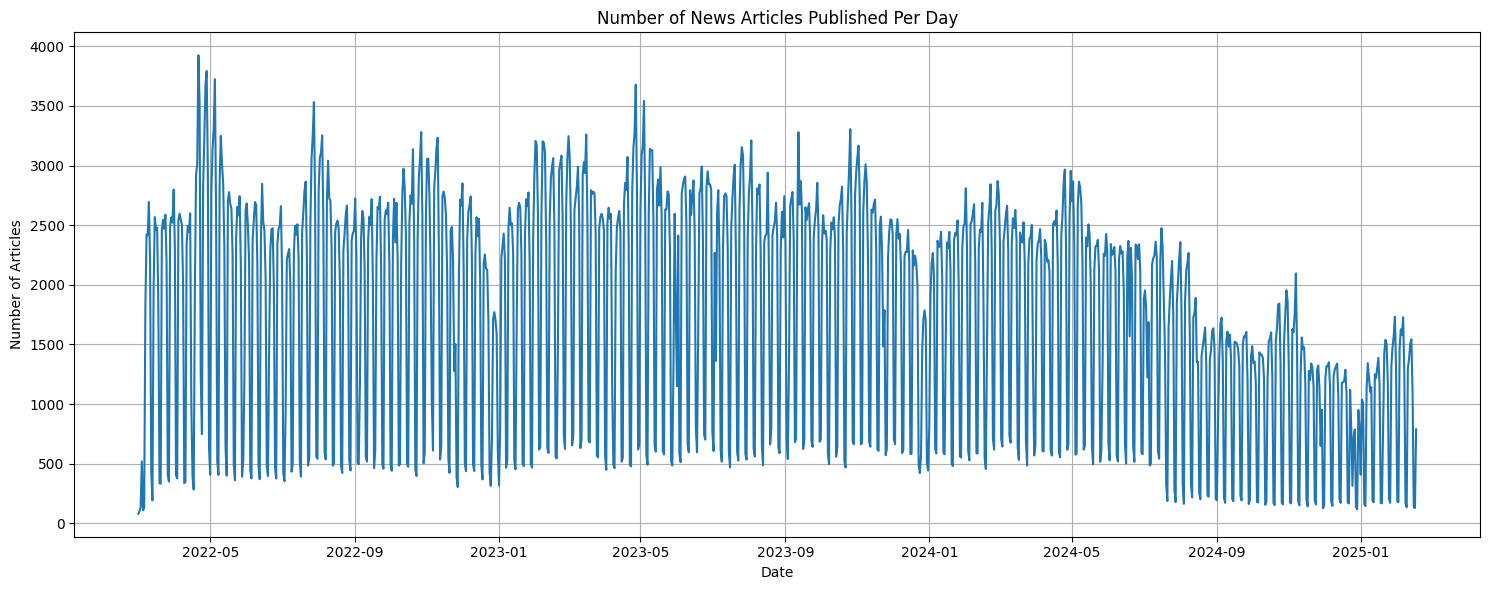

In [7]:
# Count the number of articles per day directly using the date part of 'time_published'
daily_counts = df.groupby(df['time_published'].dt.date).size()

# Plot the counts over time
plt.figure(figsize=(15, 6))
daily_counts.plot(kind='line')
plt.title('Number of News Articles Published Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.tight_layout()
plt.show()

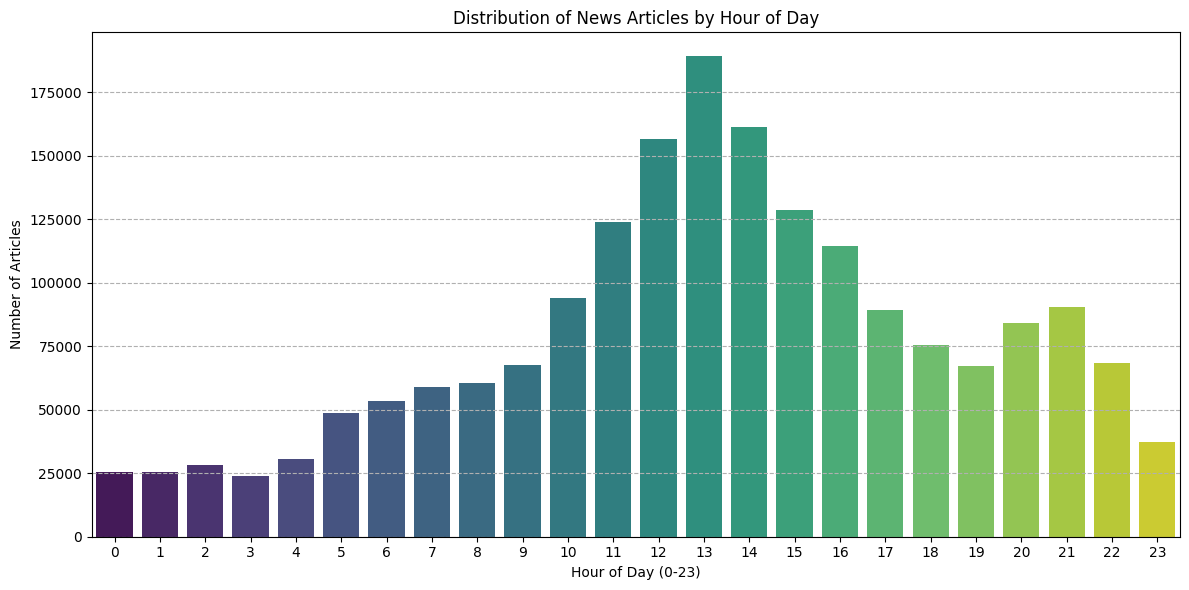

Number of articles published per hour:
time_published
0      25302
1      25510
2      28131
3      24062
4      30744
5      48773
6      53488
7      59056
8      60498
9      67738
10     94223
11    124050
12    156757
13    189222
14    161484
15    128710
16    114619
17     89476
18     75415
19     67173
20     84331
21     90460
22     68245
23     37198
dtype: int64


In [8]:
# Count the number of articles per hour directly using the hour part of 'time_published'
hourly_counts = df.groupby(df['time_published'].dt.hour).size()

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette='viridis')
plt.title('Distribution of News Articles by Hour of Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Articles')
plt.xticks(range(0, 24)) # Ensure all hours are shown on the x-axis
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

# Display the counts per hour
print("Number of articles published per hour:")
print(hourly_counts)

### Sentiment

In [9]:
def clean_sentiment(sentiment_dict):
  if isinstance(sentiment_dict, dict) and 'label' in sentiment_dict and 'score' in sentiment_dict:
    if sentiment_dict['label'] == 'Positive':
      return sentiment_dict['score']
    elif sentiment_dict['label'] == 'Neutral':
      return 0
    elif sentiment_dict['label'] == 'Negative':
      return -sentiment_dict['score']
    else:
      return np.nan
  return np.nan

df['title_sentiment_finbert'] = df['title_sentiment_finbert'].apply(clean_sentiment)
df['summary_sentiment_finbert'] = df['summary_sentiment_finbert'].apply(clean_sentiment)

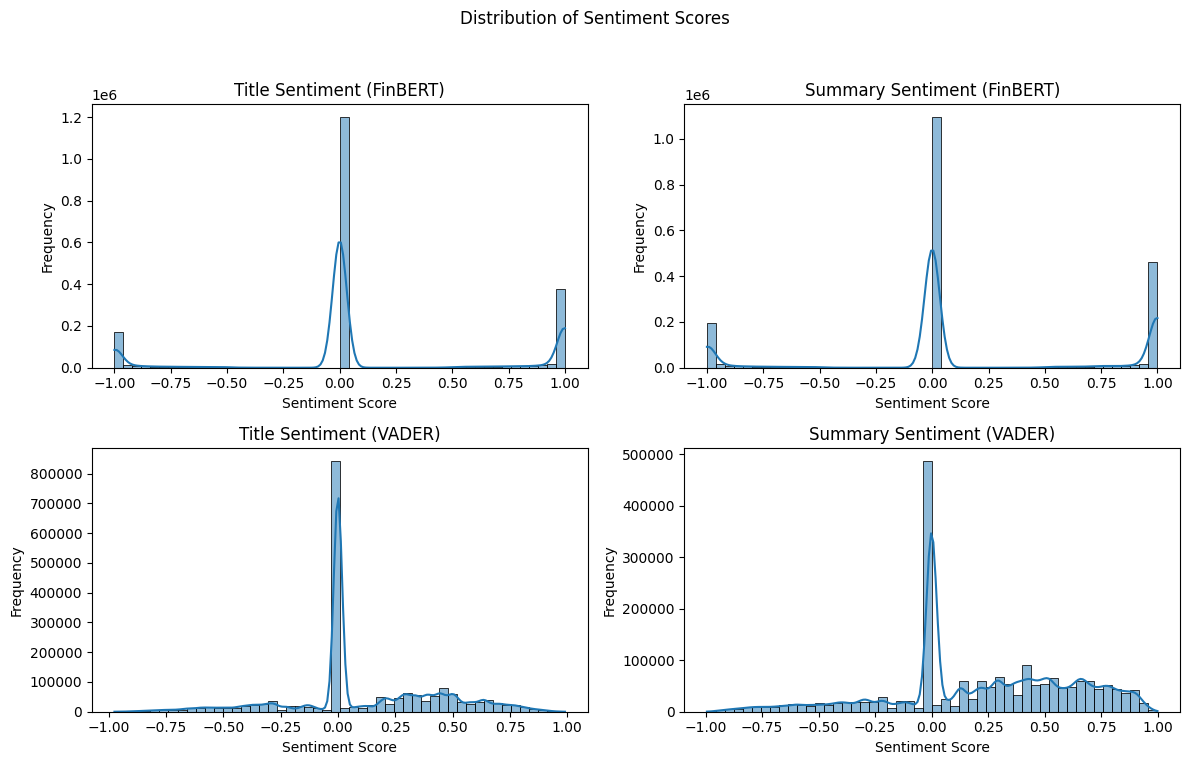

In [10]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribution of Sentiment Scores')

# Define the number of bins
num_bins = 50

# Plot distribution for title_sentiment_finbert
sns.histplot(df['title_sentiment_finbert'].dropna(), ax=axes[0, 0], kde=True, bins=num_bins)
axes[0, 0].set_title('Title Sentiment (FinBERT)')
axes[0, 0].set_xlabel('Sentiment Score')
axes[0, 0].set_ylabel('Frequency')


# Plot distribution for summary_sentiment_finbert
sns.histplot(df['summary_sentiment_finbert'].dropna(), ax=axes[0, 1], kde=True, bins=num_bins)
axes[0, 1].set_title('Summary Sentiment (FinBERT)')
axes[0, 1].set_xlabel('Sentiment Score')
axes[0, 1].set_ylabel('Frequency')


# Plot distribution for title_sentiment_vader
sns.histplot(df['title_sentiment_vader'].dropna(), ax=axes[1, 0], kde=True, bins=num_bins)
axes[1, 0].set_title('Title Sentiment (VADER)')
axes[1, 0].set_xlabel('Sentiment Score')
axes[1, 0].set_ylabel('Frequency')


# Plot distribution for summary_sentiment_vader
sns.histplot(df['summary_sentiment_vader'].dropna(), ax=axes[1, 1], kde=True, bins=num_bins)
axes[1, 1].set_title('Summary Sentiment (VADER)')
axes[1, 1].set_xlabel('Sentiment Score')
axes[1, 1].set_ylabel('Frequency')


# Adjust layout and display plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### NER

In [11]:
df['NER_org'] = df['NER'].apply(
  lambda entities: [entity[0] for entity in entities if entity[1] == 'ORG']
  if isinstance(entities, (list, np.ndarray)) else list()
)
df['NER_gpe'] = df['NER'].apply(
  lambda entities: [entity[0] for entity in entities if entity[1] == 'GPE']
  if isinstance(entities, (list, np.ndarray)) else list()
)
df['NER_person'] = df['NER'].apply(
  lambda entities: [entity[0] for entity in entities if entity[1] == 'PERSON']
  if isinstance(entities, (list, np.ndarray)) else list()
)
df['NER_norp'] = df['NER'].apply(
  lambda entities: [entity[0] for entity in entities if entity[1] == 'NORP']
  if isinstance(entities, (list, np.ndarray)) else list()
)
df['NER_product'] = df['NER'].apply(
  lambda entities: [entity[0] for entity in entities if entity[1] == 'PRODUCT']
  if isinstance(entities, (list, np.ndarray)) else list()
)
df['NER_event'] = df['NER'].apply(
  lambda entities: [entity[0] for entity in entities if entity[1] == 'EVENT']
  if isinstance(entities, (list, np.ndarray)) else list()
)

In [12]:
# Clean text in NER columns

stopword_set = set(stopwords.words('english'))

def clean_ner(ner_list):
  cleaned_list = []
  for entity in ner_list:
    cleaned_entity = re.sub(r'[^\w\s]', '', entity).lower()
    if (len(cleaned_entity) > 1 and cleaned_entity not in stopword_set):
      cleaned_list.append(cleaned_entity)
  return cleaned_list

ner_cols = [col for col in df.columns if col.startswith('NER_')]
for col in ner_cols:
  df[col] = df[col].apply(clean_ner)

In [13]:
# Calculate and display top 20 frequent items for each NER column

for col in ner_cols:
  # Flatten the list of lists into a single list/series
  # Use explode() for pandas >= 0.25
  all_entities = df[col].explode()

  # Remove potential NaN values resulting from empty lists after explode
  all_entities = all_entities.dropna()

  # Count the frequency of each entity
  entity_counts = Counter(all_entities)

  # Get the top 20 most common entities
  top_20 = entity_counts.most_common(20)

  print(f"\nTop 20 frequent items in {col}:")
  if top_20:
    # Create a DataFrame for better display
    top_20_df = pd.DataFrame(top_20, columns=['Entity', 'Frequency'])
    print(top_20_df)
  else:
    print("No entities found in this column.")



Top 20 frequent items in NER_org:
                   Entity  Frequency
0          globe newswire     198673
1   the financial express      62638
2            stocknewscom      48198
3                 reuters      44780
4                   tesla      37205
5                  nasdaq      28054
6                   apple      26967
7                     fed      23188
8                   zacks      22243
9                  nvidia      21678
10       business insider      19013
11              microsoft      18651
12               benzinga      18485
13                 amazon      17506
14                 google      15074
15                company      14780
16                twitter      13870
17                    sec      13522
18                netflix      12669
19                   meta      12540

Top 20 frequent items in NER_gpe:
               Entity  Frequency
0                  us     138667
1            new york      64138
2               china      59105
3               india

Removing NER about products and events, due to sparse counts. (less mentions)  
Removing NER about company names and news source, since we already got it in a seperate column. (dulicated features)

Now, we create signals on useful entities that are:
1. high impact (financial knowledge)
2. frequent mentions (data driven)

In [14]:
# Extract all entities related to organizations, locations, and people
df['NER_all'] = df['NER'].apply(
  lambda entities: [entity[0] for entity in entities if entity[1] in ['ORG', 'GPE', 'PERSON', 'NORP']]
  if isinstance(entities, (list, np.ndarray)) else list()
)
df['NER_all'] = df['NER_all'].apply(clean_ner)

In [15]:
# Calculate and display top frequent items on df['NER_all']
print("\nMost requent items in NER_all (ORG, GPE, PERSON, NORP):")

all_entities_combined = df['NER_all'].explode()
all_entities_combined = all_entities_combined.dropna()
entity_counts_combined = Counter(all_entities_combined)

top_combined = entity_counts_combined.most_common(1000)
top_combined_df = pd.DataFrame(top_combined, columns=['Entity', 'Frequency'])

print(top_combined_df['Entity'].tolist())
print(top_combined_df.head(30))


Most requent items in NER_all (ORG, GPE, PERSON, NORP):
['globe newswire', 'us', 'new york', 'the financial express', 'china', 'stocknewscom', 'reuters', 'india', 'tesla', 'nasdaq', 'apple', 'canada', 'fed', 'zacks', 'nvidia', 'russia', 'trump', 'toronto', 'biden', 'ukraine', 'elon musk', 'business insider', 'chinese', 'microsoft', 'benzinga', 'amazon', 'uk', 'calif', 'google', 'vancouver', 'the united states', 'company', 'twitter', 'london', 'sec', 'texas', 'netflix', 'hong kong', 'meta', 'israel', 'los angeles', 'zackscom', 'indian', 'russian', 'japan', 'tsla', 'british columbia', 'defense world', 'california', 'fda', 'alphabet', 'washington', 'boeing', 'aapl', 'donald trump', 'the associated press', 'australia', 'americans', 'european', 'germany', 'business standard', 'san francisco', 'american', 'singapore', 'canadian', 'florida', 'united states', 'disney', 'san diego', 'rosen', 'walmart', 'beijing', 'chicago', 'america', 'fla', 'rbi', 'musk', 'ny', 'cnn', 'eu', 'board of director

Mapping similar raw entities to the same actual entities.  
For example, us and unitied states are refering to the same entitiy.  

In this step, AI was used to generate a mapping table.  
The following prompt was sent to OpenAI o1

Given the result of a Named Entity Recognition (NER) model, group and normalize entities related to Geopolitical Entities and People.  
Prioritize entities that are significant in financial analysis and most frequently mentioned.  
Group variations of the same entity (e.g., "U.S.", "United States", "USA") together under a canonical name.  
Disambiguate people with common names based on context if available (e.g., “Powell” → “Jerome Powell”).  
Please generate a Python dictionary used for mapping table from NER output to useful entities in NLP modelling.  
Output should be a Python dictionary:  
{'standardized_entity_1': ['raw_entity_1', 'raw_entity_2'], 'standardized_entity_2': ...}

In [16]:
# Mapping table generated by OpenAI o1
mapping_dict = {
    # -------------------------
    # Geopolitical Entities
    # -------------------------
    "United States": [
        "us", 
        "usa", 
        "u.s.", 
        "united states", 
        "the united states", 
        "america", 
        "americans", 
        "american"
    ],
    "China": [
        "china", 
        "chinese"
    ],
    "India": [
        "india", 
        "indian"
    ],
    "Russia": [
        "russia", 
        "russian"
    ],
    "Ukraine": [
        "ukraine",
        "ukrainian"
    ],
    "United Kingdom": [
        "uk", 
        "british", 
        "england", 
        "britain", 
        "united kingdom"
    ],
    "Canada": [
        "canada", 
        "canadian"
    ],
    "Germany": [
        "germany", 
        "german"
    ],
    "France": [
        "france", 
        "french"
    ],
    "Japan": [
        "japan", 
        "japanese"
    ],
    "Australia": [
        "australia", 
        "australian"
    ],
    "Saudi Arabia": [
        "saudi arabia",
        "saudi"
    ],
    "Israel": [
        "israel",
        "israeli"
    ],
    "Switzerland": [
        "switzerland",
        "swiss"
    ],
    "Brazil": [
        "brazil",
        "brazilian"
    ],
    "South Korea": [
        "south korea",
        "south korean"
    ],
    "United Arab Emirates": [
        "uae",
        "united arab emirates"
    ],
    "European Union": [
        "the european union",
        "european union",
        "european"  # as a shorthand if used to refer to the EU context
    ],
    "Hong Kong": [
        "hong kong",
        "hong kongs"
    ],
    "Turkey": [
        "turkey",
        "turkish"
    ],
    "Sweden": [
        "sweden",
        "swedish"
    ],
    "Mexico": [
        "mexico",
        "mexican"
    ],
    "Pakistan": [
        "pakistan"
    ],
    "Iran": [
        "iran"
    ],
    "Norway": [
        "norway"
    ],
    "Malaysia": [
        "malaysia"
    ],
    "Indonesia": [
        "indonesia"
    ],
    "Denmark": [
        "denmark"
    ],
    "Poland": [
        "poland"
    ],
    "Qatar": [
        "qatar"
    ],
    "Hungary": [
        "hungary"
    ],
    "England": [
        # Note: If "England" is used distinctly from "UK," 
        # you could map it separately. But often grouped with "United Kingdom."
    ],
    # Selected U.S. States (where clear variations appear):
    "California": [
        "calif",
        "california"
    ],
    "New York": [
        "new york",
        "ny",
        "nyc"
    ],
    "Florida": [
        "fl",
        "fla",
        "florida"
    ],
    "Texas": [
        "tx",
        "texas"
    ],
    "New Jersey": [
        "nj",
        "new jersey"
    ],
    "Pennsylvania": [
        "pa",
        "pennsylvania"
    ],
    "Virginia": [
        "va",
        "virginia"
    ],
    "North Carolina": [
        "nc",
        "north carolina"
    ],
    "South Carolina": [
        "sc",
        "south carolina"
    ],
    "Washington": [
        "washington"
    ],
    "Colorado": [
        "colo",
        "colorado"
    ],
    "Michigan": [
        "mich",
        "michigan"
    ],
    "Arizona": [
        "ariz",
        "arizona"
    ],
    "Illinois": [
        "ill",
        "illinois"
    ],
    "Tennessee": [
        "tenn",
        "tennessee"
    ],
    "Massachusetts": [
        "mass",
        "massachusetts"
    ],
    "Connecticut": [
        "conn",
        "connecticut"
    ],
    "Louisiana": [
        "la",
        "louisiana"
    ],
    "Ohio": [
        "ohio"
    ],
    "Indiana": [
        "indiana"
    ],
    "Delaware": [
        "del",
        "delaware"
    ],

    # -------------------------
    # People
    # -------------------------
    "Donald Trump": [
        "trump", 
        "donald trump", 
        "donald trumps"
    ],
    "Joe Biden": [
        "biden",
        "joe biden"
    ],
    "Elon Musk": [
        "elon musk", 
        "elon musks", 
        "musk"
    ],
    "Jerome Powell": [
        "powell"
    ],
    "Warren Buffett": [
        "warren buffett", 
        "warren buffetts", 
        "buffett"
    ],
    "Narendra Modi": [
        "modi",
        "narendra modi"
    ],
    "Xi Jinping": [
        "xi jinping"
    ],
    "Jamie Dimon": [
        "jamie dimon"
    ],
    "Mark Zuckerberg": [
        "mark zuckerberg"
    ],
    "Sam Altman": [
        "sam altman"
    ],
    "Sam Bankman-Fried": [
        "sam bankmanfried"
    ],
    "Ron DeSantis": [
        "ron desantis",
        "desantis"
    ],
    "Vladimir Putin": [
        "putin"
    ],
    "Jeff Bezos": [
        "jeff bezos"
    ],
    "Cathie Wood": [
        "cathie wood", 
        "cathie woods"
    ],
    "Kamala Harris": [
        "kamala harris", 
        "harris"
    ],
    "Bill Gates": [
        "bill gates"
    ],
    "Tucker Carlson": [
        "tucker carlson"
    ],
    "Tim Cook": [
        "tim cook"
    ]
}

In [17]:
# clean entities df['NER_all'] using mapping_dict
def map_entities(entities, mapping_dict):
  mapped_entities = []
  for entity in entities:
    found = False
    for key, values in mapping_dict.items():
      if entity in values:
        mapped_entities.append(key)
        found = True
        break
    if not found:
      mapped_entities.append(entity)
  return mapped_entities

df['NER_mapped'] = df['NER_all'].apply(lambda x: map_entities(x, mapping_dict))

In [18]:
# Display most frequent items on df['NER_mapped']
print("\nMost frequent items in NER_mapped (after mapping):")

all_entities_mapped = df['NER_mapped'].explode()
all_entities_mapped = all_entities_mapped.dropna()
entity_counts_mapped = Counter(all_entities_mapped)

top_mapped = entity_counts_mapped.most_common(30)
top_mapped_df = pd.DataFrame(top_mapped, columns=['Mapped Entity', 'Frequency'])

print(top_mapped_df)


Most frequent items in NER_mapped (after mapping):
            Mapped Entity  Frequency
0          globe newswire     201194
1           United States     188814
2                   China      77960
3                New York      72129
4   the financial express      62700
5                   India      56037
6            stocknewscom      48198
7                 reuters      44781
8                   tesla      37207
9                  Russia      33336
10                 Canada      32612
11           Donald Trump      31530
12              Elon Musk      31129
13         United Kingdom      29482
14                 nasdaq      28054
15             California      27017
16                  apple      26969
17              Joe Biden      26444
18                    fed      23190
19                Ukraine      22645
20                  zacks      22243
21                 nvidia      21679
22                toronto      21000
23       business insider      19023
24              microso

In [19]:
# Define the entities and their corresponding new column names
entity_signal_map = {
  'United States': 'NER_US',
  'China': 'NER_China',
  'India': 'NER_India',
  'Russia': 'NER_Russia',
  'Canada': 'NER_Canada',
  'United Kingdom': 'NER_UK',
  'Donald Trump': 'NER_Trump',
  'Elon Musk': 'NER_ElonMusk',
  'Joe Biden': 'NER_JoeBiden',
  'fed': 'NER_FED',
  'Ukraine': 'NER_Ukraine',
  'Japan': 'NER_Japan'
}

# Create new boolean columns based on the presence of entities in NER_mapped
for entity, col_name in entity_signal_map.items():
  df[col_name] = df['NER_mapped'].apply(lambda mapped_list: entity in mapped_list if isinstance(mapped_list, list) else False)

# Display the first few rows with the new columns
print(df[[col for col in entity_signal_map.values()]].head())

# Calculate counts for each new signal column
counts_list = []
for col_name in entity_signal_map.values():
  counts = df[col_name].value_counts()
  true_count = counts.get(True, 0)
  false_count = counts.get(False, 0)
  total_count = true_count + false_count
  true_percentage = (true_count / total_count) * 100 if total_count > 0 else 0
  counts_list.append({
      'Signal': col_name,
      'True Count': true_count,
      'False Count': false_count,
      'True Percentage': f"{true_percentage:.2f}%" # Format as percentage string
  })

# Create a DataFrame from the list of counts
counts_df = pd.DataFrame(counts_list)

# Display the counts table
print("\nCounts for each signal column:")
print(counts_df.to_string(index=False))

        NER_US  NER_China  NER_India  NER_Russia  NER_Canada  NER_UK  \
newsID                                                                 
1         True      False      False        True       False   False   
2        False      False      False       False       False   False   
3        False      False      False        True       False   False   
4        False      False       True       False       False   False   
5         True      False      False        True       False   False   

        NER_Trump  NER_ElonMusk  NER_JoeBiden  NER_FED  NER_Ukraine  NER_Japan  
newsID                                                                          
1           False         False         False    False         True      False  
2           False         False         False    False        False      False  
3           False         False         False    False        False      False  
4           False         False         False    False        False      False  
5        

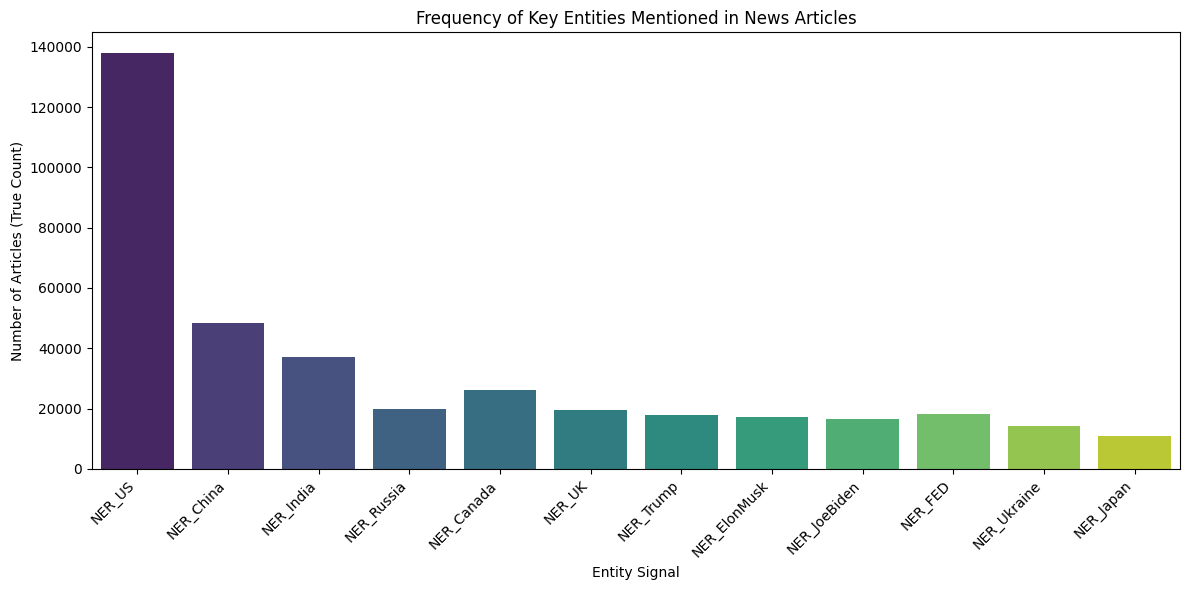

In [20]:
# Visualize the counts of the signal columns
plt.figure(figsize=(12, 6))
sns.barplot(x='Signal', y='True Count', data=counts_df, palette='viridis')
plt.title('Frequency of Key Entities Mentioned in News Articles')
plt.xlabel('Entity Signal')
plt.ylabel('Number of Articles (True Count)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
# Drop NER columns that are no longer needed
cols_to_drop = ['NER', 'NER_org', 'NER_gpe', 'NER_person', 'NER_norp', 'NER_product', 'NER_event', 'NER_all', 'NER_mapped']
df = df.drop(columns=cols_to_drop)

df.head()

,title,summary,time_published,source,title_sentiment_finbert,summary_sentiment_finbert,title_sentiment_vader,summary_sentiment_vader,topic_announcements,topic_market_movements,...,NER_India,NER_Russia,NER_Canada,NER_UK,NER_Trump,NER_ElonMusk,NER_JoeBiden,NER_FED,NER_Ukraine,NER_Japan
newsID,,,,,,,,,,,,,,,,,,,,,
1,Oil prices could determine how markets react t...,The heavy new round of sanctions on Russia by ...,2022-03-01 00:02:02,CNBC,-0.631240,-0.619794,0.0000,0.0000,False,False,...,False,True,False,False,False,False,False,False,True,False
2,Zoom provides disappointing revenue forecast f...,Zoom's revenue growth is continuing to slow af...,2022-03-01 00:15:56,CNBC,-0.999999,-1.000000,-0.4939,0.3818,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Wall Street rallies as West hits Russia with n...,"The SP 500 rose more than 1%, ending a four-da...",2022-03-01 00:46:51,Money Control,0.000000,0.999998,0.0000,-0.5106,False,False,...,False,True,False,False,False,False,False,False,False,False
4,"Weak manufacturing drags down Q3 GDP growth, o...",India's economy grew 5.4% in the three months ...,2022-03-01 02:23:00,Economic Times,-0.999998,-0.995447,0.1531,-0.2960,False,False,...,True,False,False,False,False,False,False,False,False,False
5,Singapore banks halt lending for Russian goods...,Singapore's biggest banks are restricting trad...,2022-03-01 02:30:56,South China Morning Post,-0.985850,-0.971956,-0.1027,-0.4215,False,False,...,False,True,False,False,False,False,False,False,True,True


### Topics

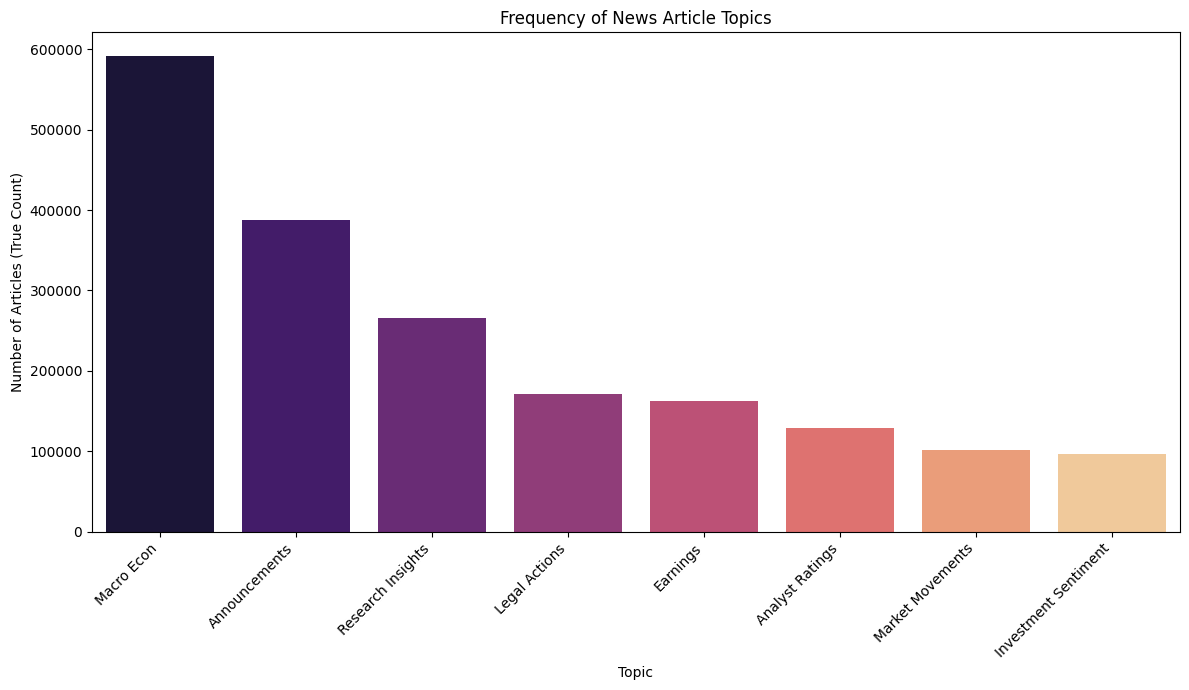


Counts for each topic column:
               Topic  True Count  False Count True Percentage
          Macro Econ      591385      1313280          31.05%
       Announcements      387921      1516744          20.37%
   Research Insights      265488      1639177          13.94%
       Legal Actions      171210      1733455           8.99%
            Earnings      162396      1742269           8.53%
     Analyst Ratings      128521      1776144           6.75%
    Market Movements      101687      1802978           5.34%
Investment Sentiment       96057      1808608           5.04%


In [22]:
# Visualize the topic column

# Identify topic columns
topic_cols = [col for col in df.columns if col.startswith('topic_')]

# Calculate counts for each topic column
topic_counts_list = []
for col in topic_cols:
  counts = df[col].value_counts()
  true_count = counts.get(True, 0)
  false_count = counts.get(False, 0)
  total_count = true_count + false_count
  true_percentage = (true_count / total_count) * 100 if total_count > 0 else 0
  topic_counts_list.append({
      'Topic': col.replace('topic_', '').replace('_', ' ').title(),
      'True Count': true_count,
      'False Count': false_count,
      'True Percentage': f"{true_percentage:.2f}%" # Format as percentage string
  })

# Create a DataFrame from the list of counts
topic_counts_df = pd.DataFrame(topic_counts_list)

# Sort by count for better visualization
topic_counts_df = topic_counts_df.sort_values(by='True Count', ascending=False)

# Visualize the counts of the topic columns
plt.figure(figsize=(12, 7))
sns.barplot(x='Topic', y='True Count', data=topic_counts_df, palette='magma')
plt.title('Frequency of News Article Topics')
plt.xlabel('Topic')
plt.ylabel('Number of Articles (True Count)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the counts table
print("\nCounts for each topic column:")
print(topic_counts_df.to_string(index=False))

### Sectors

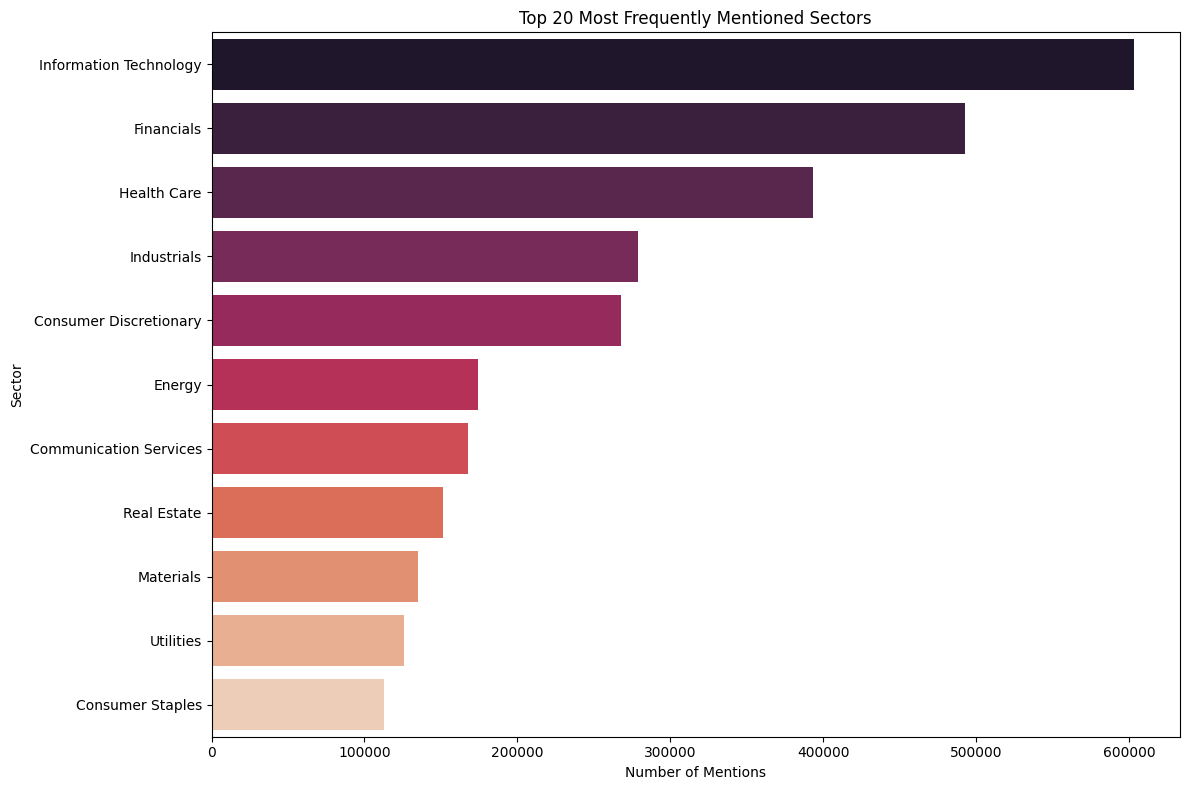


Top 20 most frequent sectors:
sectors
Information Technology    603008
Financials                492450
Health Care               393399
Industrials               279012
Consumer Discretionary    267885
Energy                    174002
Communication Services    167459
Real Estate               151545
Materials                 135230
Utilities                 125550
Consumer Staples          112882
Name: count, dtype: int64


In [23]:
# Explode the 'sectors' column to have one sector per row
all_sectors = df['sectors'].explode()

# Drop rows where sectors might have been an empty list resulting in NaN after explode
all_sectors = all_sectors.dropna()

# Count the frequency of each sector
sector_counts = all_sectors.value_counts()

# Get the top 20 most frequent sectors
top_20_sectors = sector_counts.head(20)

# Visualize the top 20 sectors
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_sectors.values, y=top_20_sectors.index, palette='rocket')
plt.title('Top 20 Most Frequently Mentioned Sectors')
plt.xlabel('Number of Mentions')
plt.ylabel('Sector')
plt.tight_layout()
plt.show()

# Display the counts table for the top 20
print("\nTop 20 most frequent sectors:")
print(top_20_sectors)

### Ticker symbol

In [24]:
import pandas as pd

In [25]:
# Get all tradable tickers
tradable_tickers = pd.read_csv('../data_collection/data_warehouse/tradable_tickers.csv', header=None)
tradable_tickers = set(tradable_tickers[0])

print(len(tradable_tickers))
print('First 10 tradable tickers:', list(tradable_tickers)[:10])

# Function to filter tickers based on the tradable_tickers
def filter_tickers(ticker_list):
  if isinstance(ticker_list, (list, np.ndarray)):
    return [ticker for ticker in ticker_list if ticker in tradable_tickers]
  return []

# Apply the function to filter tickers
df['stock_tickers'] = df['stock_tickers'].swifter.apply(filter_tickers)

2392
First 10 tradable tickers: ['PPC', 'MPC', 'BDSX', 'LNTH', 'STIM', 'FCX', 'BKH', 'TRS', 'CELC', 'RNXT']


Pandas Apply: 100%|██████████| 1904665/1904665 [00:02<00:00, 808001.26it/s]


In [26]:
# List of pontentially invalid tickers
invalid_tickers = {
  'TECH', 'COMM', 'LAND', 'RAND', 'FUND', 'TIME', 'FAST', 'ESG', 'WEED', 'BOSS', 'COIN', 'GROW'
}

# Function to filter tickers based on the invalid_tickers
def filter_tickers(ticker_list):
  if isinstance(ticker_list, (list, np.ndarray)):
    return [ticker for ticker in ticker_list if ticker not in invalid_tickers]
  return []

# Apply the function to filter tickers
df['stock_tickers'] = df['stock_tickers'].swifter.apply(filter_tickers)

Pandas Apply: 100%|██████████| 1904665/1904665 [00:01<00:00, 1249448.73it/s]


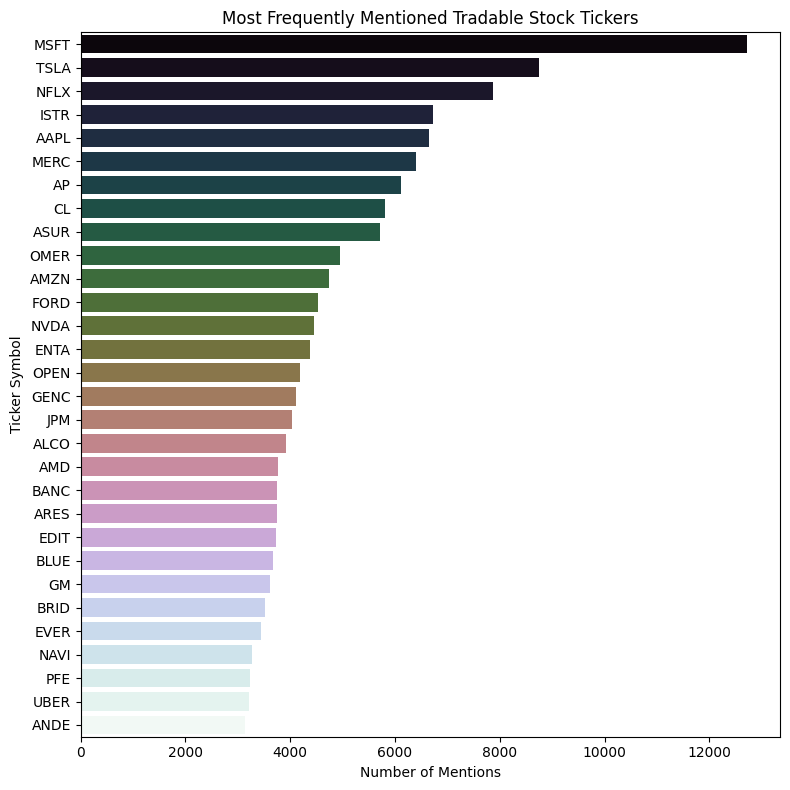


Most frequent tradable stock tickers:
stock_tickers
MSFT    12712
TSLA     8753
NFLX     7863
ISTR     6733
AAPL     6647
MERC     6407
AP       6115
CL       5817
ASUR     5714
OMER     4957
AMZN     4736
FORD     4538
NVDA     4448
ENTA     4379
OPEN     4190
GENC     4114
JPM      4029
ALCO     3922
AMD      3759
BANC     3756
ARES     3746
EDIT     3733
BLUE     3671
GM       3618
BRID     3517
EVER     3448
NAVI     3268
PFE      3224
UBER     3217
ANDE     3136
Name: count, dtype: int64


In [27]:
# Visualize the frequently mentioned tickers

tickers_explode = df['stock_tickers'].explode()
tickers_explode = tickers_explode.dropna()
ticker_counts = tickers_explode.value_counts()
top_tickers = ticker_counts.head(30)

plt.figure(figsize=(8, 8))
sns.barplot(x=top_tickers.values, y=top_tickers.index, palette='cubehelix')
plt.title('Most Frequently Mentioned Tradable Stock Tickers')
plt.xlabel('Number of Mentions')
plt.ylabel('Ticker Symbol')
plt.tight_layout()
plt.show()

# Display the counts table for the top 50
print("\nMost frequent tradable stock tickers:")
print(top_tickers)

### Remove columns no longer needed

In [28]:
# Remove columns no longer needed
df = df.drop(columns=['company_names', 'title', 'summary'])

In [31]:
print(df.shape)
df.head()

(1904665, 28)


,time_published,source,title_sentiment_finbert,summary_sentiment_finbert,title_sentiment_vader,summary_sentiment_vader,topic_announcements,topic_market_movements,topic_legal_actions,topic_investment_sentiment,...,NER_India,NER_Russia,NER_Canada,NER_UK,NER_Trump,NER_ElonMusk,NER_JoeBiden,NER_FED,NER_Ukraine,NER_Japan
newsID,,,,,,,,,,,,,,,,,,,,,
1,2022-03-01 00:02:02,CNBC,-0.631240,-0.619794,0.0000,0.0000,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
2,2022-03-01 00:15:56,CNBC,-0.999999,-1.000000,-0.4939,0.3818,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2022-03-01 00:46:51,Money Control,0.000000,0.999998,0.0000,-0.5106,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,2022-03-01 02:23:00,Economic Times,-0.999998,-0.995447,0.1531,-0.2960,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
5,2022-03-01 02:30:56,South China Morning Post,-0.985850,-0.971956,-0.1027,-0.4215,False,False,False,False,...,False,True,False,False,False,False,False,False,True,True


In [33]:
df.to_parquet('data/dataset_merged_cleaned.parquet', index=True)